# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Arrini Khirofati Jannah
- **Email:** leejindairy06@gmail.com
- **ID Dicoding:** 123limitless

## Menentukan Pertanyaan Bisnis

- Bagaimanakah hubungan suhu(temp), suhu yang dirasakan(atemp), kelembaban, dan kecepatan angin terhadap jumlah pengguna bike sharing?
- Bagaimanakah hubungan waktu (hr) terhadap jumlah pengguna bike sharing?

## Import Semua Packages/Library yang Digunakan

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [7]:
bike_sharing_day_df = pd.read_csv("data/day.csv")
bike_sharing_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
bike_sharing_hour_df=pd.read_csv("data/hour.csv")
bike_sharing_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
bike_sharing_merge_df = pd.merge(
    left=bike_sharing_day_df,
    right=bike_sharing_hour_df,
    how="inner",
    left_on="dteday",
    right_on="dteday",
    suffixes=("_daily", "_hourly")
)
bike_sharing_merge_df.head()

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- dteday antara bike sharing day dengan hour tidak ada perbedaan sehingga bisa dilakukan penggabungan 2 data frame

### Assessing Data

In [10]:
bike_sharing_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
bike_sharing_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
bike_sharing_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
bike_sharing_hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
bike_sharing_day_df.duplicated().sum()

np.int64(0)

In [15]:
bike_sharing_hour_df.duplicated().sum()

np.int64(0)

In [16]:
bike_sharing_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [17]:
bike_sharing_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [18]:
bike_sharing_merge_df.describe()

,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada masalah pada jumlah data/ tidak ada missing value pada data bike sharing day dan hour
- Tidak ada duplikasi nilai pada data bike sharing day dan hour
- Kolom dteday pada bike sharing day dan hour harusnya direpresentasikan sebagai tipe data datetime bukan object
- Nilai maximum temp_daily adalah 0.861667 dan nilai minimum 0.059130. Namun ini adalah hasil normalisasi dari suhu dalam skala Celsius agar skala datanya antara 0 dan 1. Jika dikonversi ke suhu aktual maka nilainya akan sekitar 32.5°C (maximum) dan  5.2 °C (minimum) .


### Cleaning Data

In [19]:
bike_sharing_day_df["dteday"] = bike_sharing_day_df["dteday"].apply(pd.to_datetime, format='%Y-%m-%d')
bike_sharing_hour_df["dteday"] = bike_sharing_hour_df["dteday"].apply(pd.to_datetime, format='%Y-%m-%d')
bike_sharing_merge_df['dteday'] = bike_sharing_merge_df['dteday'].apply(pd.to_datetime, format='%Y-%m-%d')


In [20]:
bike_sharing_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [21]:
bike_sharing_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [22]:
bike_sharing_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant_daily      17379 non-null  int64         
 1   dteday             17379 non-null  datetime64[ns]
 2   season_daily       17379 non-null  int64         
 3   yr_daily           17379 non-null  int64         
 4   mnth_daily         17379 non-null  int64         
 5   holiday_daily      17379 non-null  int64         
 6   weekday_daily      17379 non-null  int64         
 7   workingday_daily   17379 non-null  int64         
 8   weathersit_daily   17379 non-null  int64         
 9   temp_daily         17379 non-null  float64       
 10  atemp_daily        17379 non-null  float64       
 11  hum_daily          17379 non-null  float64       
 12  windspeed_daily    17379 non-null  float64       
 13  casual_daily       17379 non-null  int64         
 14  regist

## Exploratory Data Analysis (EDA)

### Explore ...

In [23]:
weather_cols = ['temp_daily', 'atemp_daily', 'hum_daily', 'windspeed_daily',
                'temp_hourly', 'atemp_hourly', 'hum_hourly', 'windspeed_hourly',
                'cnt_daily', 'cnt_hourly']
corr_matrix = bike_sharing_merge_df[weather_cols].corr()
daily_correlations = corr_matrix['cnt_daily'][['temp_daily', 'atemp_daily', 'hum_daily', 'windspeed_daily']]
hourly_correlations = corr_matrix['cnt_hourly'][['temp_hourly', 'atemp_hourly', 'hum_hourly', 'windspeed_hourly']]
print("Analisis Korelasi:")
print("Korelasi unsur cuaca antara cnt_daily dan cnt_hourly:")
print(daily_correlations)
print(hourly_correlations)


Analisis Korelasi:
Korelasi unsur cuaca antara cnt_daily dan cnt_hourly:
temp_daily         0.625232
atemp_daily        0.629054
hum_daily         -0.091657
windspeed_daily   -0.231340
Name: cnt_daily, dtype: float64
temp_hourly         0.404772
atemp_hourly        0.400929
hum_hourly         -0.322911
windspeed_hourly    0.093234
Name: cnt_hourly, dtype: float64


In [24]:
def convert_to_celsius(normalized_temp):
    t_min = -8
    t_max = 39
    return normalized_temp * (t_max - t_min) + t_min
print("\n Konversi ke Suhu Celsius Asli ")
print("\nDataset Harian:")
print(f"Suhu maksimum: {convert_to_celsius(bike_sharing_merge_df['temp_daily'].max()):.2f}°C")
print(f"Suhu minimum: {convert_to_celsius(bike_sharing_merge_df['temp_daily'].min()):.2f}°C")

print("\nDataset Jam:")
print(f"Suhu maksimum: {convert_to_celsius(bike_sharing_merge_df['temp_hourly'].max()):.2f}°C")
print(f"Suhu minimum: {convert_to_celsius(bike_sharing_merge_df['temp_hourly'].min()):.2f}°C")


 Konversi ke Suhu Celsius Asli 

Dataset Harian:
Suhu maksimum: 32.50°C
Suhu minimum: -5.22°C

Dataset Jam:
Suhu maksimum: 39.00°C
Suhu minimum: -7.06°C


In [25]:
hour_correlations= bike_sharing_merge_df['cnt_hourly'].corr(bike_sharing_merge_df['hr'])
print("Analisis Korelasi:")
print("Korelasi antara waktu dengan jumlah pengguna")
print (hour_correlations)

Analisis Korelasi:
Korelasi antara waktu dengan jumlah pengguna
0.39407149778294326


In [26]:
users_by_hour = bike_sharing_merge_df.groupby('hr')['cnt_hourly'].sum()

max_users_hour = users_by_hour.idxmax()
max_users_count = users_by_hour.max()
min_users_hour = users_by_hour.idxmin()
min_users_count = users_by_hour.min()

print(f"Jam dengan jumlah pengguna terbanyak: {max_users_hour}:00 dengan {max_users_count} pengguna")
print(f"Jam dengan jumlah pengguna tersedikit: {min_users_hour}:00 dengan {min_users_count} pengguna")

Jam dengan jumlah pengguna terbanyak: 17:00 dengan 336860 pengguna
Jam dengan jumlah pengguna tersedikit: 4:00 dengan 4428 pengguna


**Insight:**
- Analisis Mendalam Hubungan Cuaca dengan Pengguna Bike Sharing

Ada 4 unsur pembentukan cuaca yang diukur/dicatat oleh peneliti yakni suhu, suhu yang dirasakan, kelembaban, dan kecepatan angin. Masing-masing dari 4 unsur ini kemudian dicari tahu korelasi/hubungan dengan jumlah pengguna rental sepeda (termasuk pengguna casual dan registered)
1. Suhu (Temperature)

Suhu memiliki korelasi paling signifikan dengan jumlah pengguna bike sharing.
Pada dataset harian (daily), angka korelasi suhu dengan jumlah pengguna mencapai 0.6, sehingga menunjukan korelasi kuat terhadap orang yang melakukan rental sepeda. Demikian juga terhadap dataset hourly yang memiliki angka korelasi suhu dengan jumlah pengguna mencapai angka 0.4 sehingga menunjukan korelasi terhadap orang yang melakukan rental sepeda
2. Suhu yang Dirasakan (Apparent Temperature)

Hampir identik dengan korelasi suhu aktual. Suhu yang dirasakan memiliki korelasi dengan jumlah pengguna bike sharing.
Pada dataset harian (daily), angka korelasi suhu dengan jumlah pengguna mencapai 0.6, sehingga menunjukan korelasi kuat terhadap orang yang melakukan rental sepeda. Demikian juga terhadap dataset hourly yang memiliki angka korelasi suhu dengan jumlah pengguna mencapai angka 0.4 sehingga menunjukan korelasi terhadap orang yang melakukan rental sepeda


3. Kelembaban

Pada dataset harian (daily), angka korelasi kelembaban dengan jumlah pengguna mencapai -0.09, sehingga menunjukan korelasi lemah terhadap orang yang melakukan rental sepeda. Demikian juga terhadap dataset hourly yang memiliki angka korelasi kelembaban dengan jumlah pengguna mencapai angka -0.3 sehingga menunjukan korelasi lemah terhadap orang yang melakukan rental sepeda

4. Kecepatan Angin

Pada dataset harian (daily), angka korelasi kecepatan angin dengan jumlah pengguna mencapai -0.2, sehingga menunjukan korelasi lemah terhadap orang yang melakukan rental sepeda. Namun pada dataset hourly memiliki angka korelasi kecepatan angin dengan jumlah pengguna mencapai angka 0.09 sehingga menunjukan ada sedikit korelasi terhadap orang yang melakukan rental sepeda.


**Kesimpulan:**

Suhu memiliki korelasi paling signifikan dengan jumlah pengguna bike sharing.
- Analisis Mendalam Hubungan Waktu dengan Pengguna Bike Sharing

Kolom waktu (hr) hanya terdapat pada dataset hour. Waktu (hr) memiliki korelasi positif terhadap jumlah pengguna bike sharing. Angka korelasi mencapai 0.4

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Text(0.5, 1.0, 'Hubungan Suhu dengan Jumlah Pengguna Per-Jam')

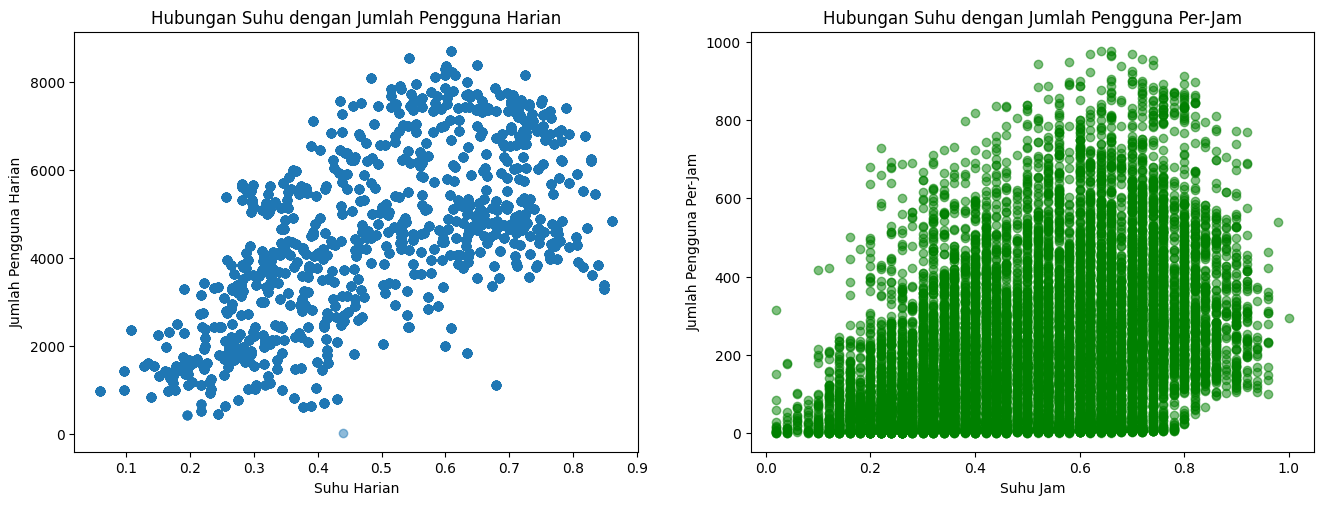

In [27]:
# Visualisasi
plt.figure(figsize=(16, 12))

# Subplot 1: Line Chart Suhu Harian vs Jumlah Pengguna
plt.subplot(2,2, 3)
plt.scatter(bike_sharing_merge_df['temp_daily'], bike_sharing_merge_df['cnt_daily'], alpha=0.5)
plt.xlabel('Suhu Harian')
plt.ylabel('Jumlah Pengguna Harian')
plt.title('Hubungan Suhu dengan Jumlah Pengguna Harian')

# Subplot 2: Scatter Plot Suhu Jam vs Jumlah Pengguna
plt.subplot(2, 2, 4)
plt.scatter(bike_sharing_merge_df['temp_hourly'], bike_sharing_merge_df['cnt_hourly'], alpha=0.5, color='green')
plt.xlabel('Suhu Jam')
plt.ylabel('Jumlah Pengguna Per-Jam')
plt.title('Hubungan Suhu dengan Jumlah Pengguna Per-Jam')


Text(0.5, 1.0, 'Hourly Apparent Temperature Jam VS Houry Users')

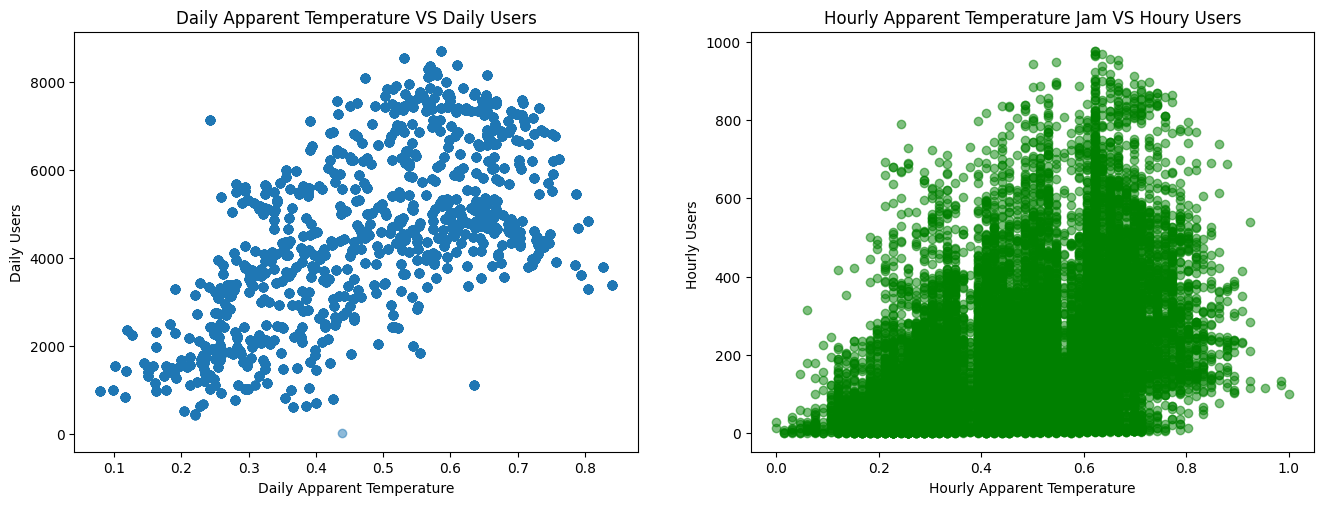

In [28]:
# Visualisasi
plt.figure(figsize=(16, 12))

# Subplot 1: Line Chart Suhu Yang Dirasakan Harian vs Jumlah Pengguna
plt.subplot(2,2, 3)
plt.scatter(bike_sharing_merge_df['atemp_daily'], bike_sharing_merge_df['cnt_daily'], alpha=0.5)
plt.xlabel('Daily Apparent Temperature')
plt.ylabel('Daily Users')
plt.title('Daily Apparent Temperature VS Daily Users')

# Subplot 2: Scatter Plot Suhu Jam vs Jumlah Pengguna
plt.subplot(2, 2, 4)
plt.scatter(bike_sharing_merge_df['atemp_hourly'], bike_sharing_merge_df['cnt_hourly'], alpha=0.5, color='green')
plt.xlabel('Hourly Apparent Temperature')
plt.ylabel('Hourly Users ')
plt.title('Hourly Apparent Temperature Jam VS Houry Users')

### Pertanyaan 2:

Text(0, 0.5, 'Users')

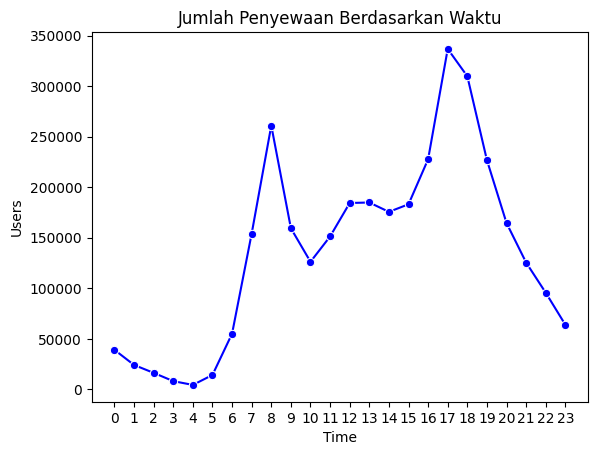

In [29]:
sns.lineplot(x=users_by_hour.index, y=users_by_hour.values, marker='o', color='b')
plt.title('Jumlah Penyewaan Berdasarkan Waktu')
plt.xticks(range(0, 24))
plt.xlabel('Time')
plt.ylabel('Users')

**Insight:**
- Jika suhu semakin hangat maka jumlah pengguna bike sharing akan meningkat
- Puncak dari penyewaan sepeda terjadi pada jam-jam tertentu seperti pagi (sekitar jam 7-9) dan sore (sekitar jam 17-19), yang mana ini merupakan jam-jam sibuk sehingga banyak orang menggunakan sepeda untuk berangkat beraktivitas

## Analisis Lanjutan (Opsional)

**RFM**
- Berapa hari sejak terakhir pengguna melakukan sewa sepeda di musim tersebut?
- Berapa banyak hari dalam dataset yang termasuk dalam musim tersebut?
- Total pengguna bike sharing dalam musim tersebut?

**Tujuan :**
mengetahui musim mana yang memiliki nilai tertinggi dari perspektif RFM sehingga dapat menentukan strategi bisnis yang tepat untuk setiap musim

In [30]:
season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
bike_sharing_merge_df['season_name'] = bike_sharing_merge_df['season_daily'].map(season_map)
print(bike_sharing_merge_df['season_name'].head())

0    Spring
1    Spring
2    Spring
3    Spring
4    Spring
Name: season_name, dtype: object


In [31]:
reference_date = bike_sharing_merge_df['dteday'].max()
season_rfm = []

for season_name, season_df in bike_sharing_merge_df.groupby(by='season_name'):
    current_date = season_df['dteday'].max()

    recency = (reference_date - current_date).days

    frequency = season_df['dteday'].nunique()

    monetary = season_df['cnt_daily'].sum()

    season_rfm.append({
        'season': season_name,
        'recency': recency,
        'frequency': frequency,
        'monetary': monetary,
    })

season_rfm_df = pd.DataFrame(season_rfm)

print("RFM Analysis by Season")
print(season_rfm_df)


RFM Analysis by Season
   season  recency  frequency  monetary
0    Fall      100        188  25420803
1  Spring        0        181  11179147
2  Summer      194        184  22024071
3  Winter       11        178  20167029


In [32]:
season_rfm_df['r_score'] = pd.qcut(season_rfm_df['recency'], 5, labels=[5, 4, 3, 2, 1], duplicates='drop')
season_rfm_df['f_score'] = pd.qcut(season_rfm_df['frequency'], 5, labels=[1, 2, 3, 4, 5], duplicates='drop')
season_rfm_df['m_score'] = pd.qcut(season_rfm_df['monetary'], 5, labels=[1, 2, 3, 4, 5], duplicates='drop')

print(season_rfm_df)

   season  recency  frequency  monetary r_score f_score m_score
0    Fall      100        188  25420803       2       5       5
1  Spring        0        181  11179147       5       2       1
2  Summer      194        184  22024071       1       4       4
3  Winter       11        178  20167029       4       1       2


C:\Users\MateBookD15\AppData\Local\Temp\ipykernel_21616\3907142517.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='recency', data=season_rfm_df, palette='coolwarm')


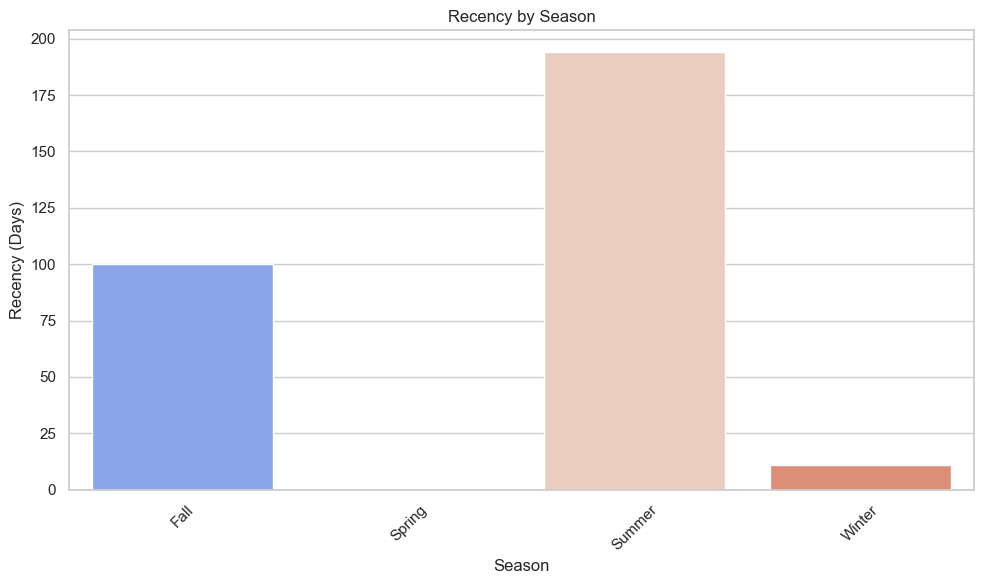

C:\Users\MateBookD15\AppData\Local\Temp\ipykernel_21616\3907142517.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='frequency', data=season_rfm_df, palette='viridis')


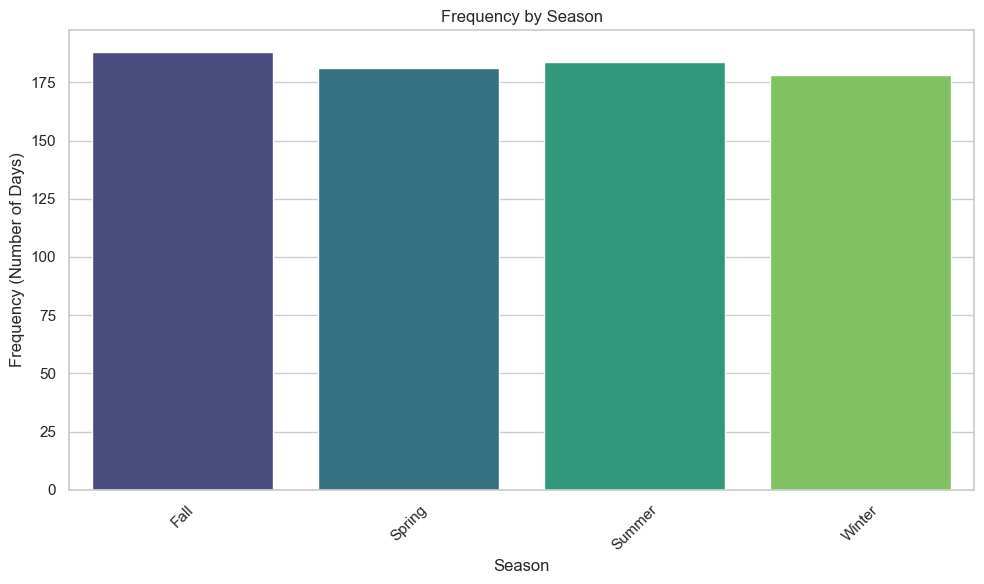

C:\Users\MateBookD15\AppData\Local\Temp\ipykernel_21616\3907142517.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='monetary', data=season_rfm_df, palette='magma')


([0, 1, 2, 3],
 [Text(0, 0, 'Fall'),
  Text(1, 0, 'Spring'),
  Text(2, 0, 'Summer'),
  Text(3, 0, 'Winter')])

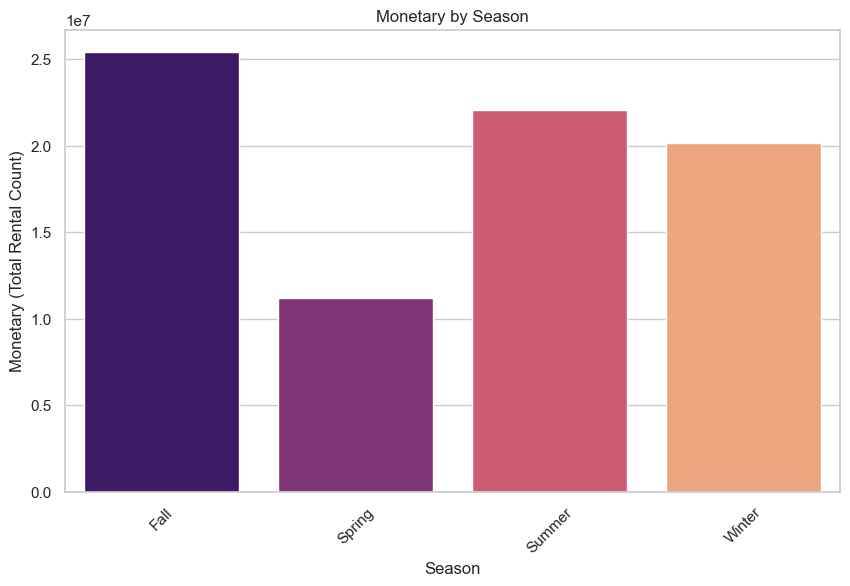

In [33]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='recency', data=season_rfm_df, palette='coolwarm')
plt.title('Recency by Season')
plt.xlabel('Season')
plt.ylabel('Recency (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='frequency', data=season_rfm_df, palette='viridis')
plt.title('Frequency by Season')
plt.xlabel('Season')
plt.ylabel('Frequency (Number of Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='monetary', data=season_rfm_df, palette='magma')
plt.title('Monetary by Season')
plt.xlabel('Season')
plt.ylabel('Monetary (Total Rental Count)')
plt.xticks(rotation=45)

**Insight:**

- Analisis RFM berdasarkan musim

Skor R: 5 untuk yang paling baru (recency terendah)

Skor F: 5 untuk frekuensi tertinggi

Skor M: 5 untuk nilai rata-rata tertinggi

Catatan : For recency, lower is better (more recent = higher score). For frequency and monetary, higher is better

Dari hasil pemrosesan oleh sistem dapat diketahui bahwa musim (season) dengan recency (R) terendah adalah musim **SUMMER** artinya musim ini memiliki penyewaan paling baru, sementara untuk musim dengan recency (R) tertinggi ialah musim **SPRING** artinya musim ini memiliki rentang waktu sejak penyewaan terakhir (yaitu, hari penyewaan terakhir dalam musim tersebut) adalah yang paling lama dibandingkan dengan musim lainnya.

Selanjutnya untuk musim (season) dengan frequency (F) terendah adalah musim **WINTER** artinya musim ini memiliki jumlah hari paling sedikit dimana pengguna melakukan rental sepeda , sementara untuk musim dengan frequency (F) tertinggi ialah musim **FALL** artinya musim ini memiliki jumlah hari paling banyak dimana pengguna melakukan rental sepeda.

Terakhir adalah musim (season) dengan monetary (M) terendah adalah musim **SPRING** artinya musim ini memiliki jumlah pengguna bike sharing paling sedikit , sementara untuk musim dengan monetary (M) tertinggi ialah musim **FALL** artinya musim ini memiliki jumlah pengguna bike sharing paling banyak




## Conclusion

- Dari 4 unsur pembentukan cuaca yang diukur/dicatat oleh peneliti yakni suhu, suhu yang dirasakan, kelembaban, dan kecepatan angin, suhu memiliki korelasi paling signifikan dengan jumlah pengguna bike sharing. Dibuktikan dengan jika suhu semakin hangat maka jumlah pengguna bike sharing akan meningkat
- Waktu memiliki korelasi terhadap jumlah pengguna bike sharing. Dibuktikan puncak dari penyewaan sepeda terjadi pada jam-jam tertentu seperti pagi (sekitar jam 7-9) dan sore (sekitar jam 17-19), yang mana ini merupakan jam-jam sibuk sehingga banyak orang menggunakan sepeda untuk berangkat beraktivitas
- Diperlukan perhatian khusus seperti strategi promosi bike sharing pada musim semi agar dapat menaikkan jumlah pengguna bike sharing. Lalu, yang menarik pada musim Dingin memiliki frekuensi terendah tetapi memiliki jumlah pendapatan yang lumayan. Sehingga mungkin dapat mencari cara untuk mempertahankan pelanggan melalui promosi yang ditargetkan seperti special winter offers. Pada musim panas jumlah penyewaan sepeda memiliki frekuensi tertinggi dan jumlah pendapatan yang solid. Perlu diperhatikan sebab jika suhu semakin hangat maka jumlah pengguna bike sharing dapat meningkat sehingga perlu memastikan stok sepeda yang cukup dan memberikan promosi atau penawaran dapat lebih meningkatkan revenue. Musim gugur memiliki jumlah revenue terbanyak dan jumlah pengguna terbanyak sehingga dapat melakukan strategi untuk melibatkan kembali pelanggan selama musim ini, seperti diskon untuk pelanggan sebelumnya atau penawaran khusus berdasarkan aktivitas sebelumnya.